In [59]:
import torch
import inspect
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
torch.__version__

'0.3.1b0+4cf3225'

In [60]:
input_size = 8
num_classes = 1
num_epochs=500
batch_size=100
learning_rate=0.1
torch.manual_seed(120)

In [61]:
class LogisticRegresion(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegresion, self).__init__()
        self.l1 = nn.Linear(input_size, 6)
        self.l2 = nn.Linear(6, 4)
        self.l3 = nn.Linear(4, num_classes)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        out3 = self.sigmoid(self.l3(out2))
        return out3

In [62]:
class Titanic_Train_Dataloader(Dataset):
    def __init__(self):
        self.x_data = pd.read_csv('../Data/new_data.csv', delimiter=',', dtype = np.float32, header = 0)
        self.y_data = pd.read_csv('../Data/new_targets.csv', delimiter=',', dtype = np.float32, header = 0)
        self.x_data = torch.from_numpy(self.x_data.as_matrix())
        self.y_data = torch.from_numpy(self.y_data.as_matrix())
        self.len = self.x_data.shape[0]
    
    def __getitem__(self, index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len

In [63]:
class Titanic_Test_Dataloader(Dataset):
    def __init__(self):
        self.x_data = pd.read_csv('../Data/new_test_data.csv', delimiter=',', dtype = np.float32, header = 0)
        self.y_data = pd.read_csv('../Data/gender_submission.csv', delimiter=',', dtype = np.float32, header = 0)
        self.x_data = torch.from_numpy(self.x_data.as_matrix())
        self.y_data = torch.from_numpy(self.y_data.as_matrix())
        self.len = self.x_data.shape[0]
    
    def __getitem__(self, index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len

In [64]:
model = LogisticRegresion(input_size, num_classes=num_classes)

In [65]:
titanic_train_data = Titanic_Train_Dataloader()
train_loader = DataLoader(dataset = titanic_train_data, batch_size=32, shuffle = True)
titanic_test_data = Titanic_Test_Dataloader()
test_loader = DataLoader(dataset = titanic_test_data, batch_size=32, shuffle = True)

In [66]:
crieterion = nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
total_train_loss = 0
total_test_loss = 0
num_train_examples = 891
num_test_examples = test_loader.__len__()*32
training_losses = []
testing_losses = []
iterations = []
print(num_train_examples, num_test_examples)

891 416


In [67]:
for epoch in range(num_epochs):
        for _index, train_data in enumerate(train_loader):
            x_train, y_train = train_data
            x_train = Variable(x_train)
            y_train = Variable(y_train)
            optimizer.zero_grad()
            outputs = model(x_train)
            train_loss = crieterion(outputs, y_train)
            total_train_loss += train_loss.data[0]
            train_loss.backward()
            optimizer.step()
            for index, test_data in enumerate(test_loader):
                x_test, y_test = test_data
                x_test = Variable(x_test)
                y_test = Variable(y_test)
                y_pred = model(x_test)
                test_loss = crieterion(y_pred, y_test)
                total_test_loss += test_loss.data[0]    
        total_train_loss /= num_train_examples
        total_test_loss /= num_test_examples
        training_losses.append(total_train_loss)
        testing_losses.append(total_test_loss)
        iterations.append(epoch)
#         print(f'Train_loss[{epoch}/{num_epochs}] {total_train_loss} Test_loss [{epoch}/{num_epochs}] {total_test_loss}')
        total_train_loss = 0
        total_test_loss = 0

In [68]:
testing_losses

[0.585591203891314,
 0.5759861029397982,
 0.5742927378473374,
 0.5749170303058165,
 0.5739909742887204,
 0.5735288376991565,
 0.5741194493782061,
 0.5730630729634029,
 0.5728157973633363,
 0.5730570805473969,
 0.572368249297142,
 0.5715124051158245,
 0.570938804688362,
 0.5711059498672302,
 0.5695278815065439,
 0.56884601038809,
 0.5692376077461702,
 0.5668160584397041,
 0.5658381091287503,
 0.5645631258017741,
 0.5628353027770152,
 0.5610090327950624,
 0.5584995586138505,
 0.5562380964939411,
 0.5529348956277738,
 0.5499644646277795,
 0.5459463959559798,
 0.5419302076960986,
 0.5374626137602788,
 0.5318730340984005,
 0.5266853699890467,
 0.5206349415418047,
 0.5143349988815876,
 0.507410252180237,
 0.5005438847180742,
 0.4938967960815017,
 0.4864995004609227,
 0.479087270079897,
 0.47160225898887104,
 0.4641127997579483,
 0.4563798023960911,
 0.44868565837924296,
 0.4420859014185575,
 0.4345098607098827,
 0.4268314219438113,
 0.4193167226532331,
 0.4116536148895438,
 0.404475960808877

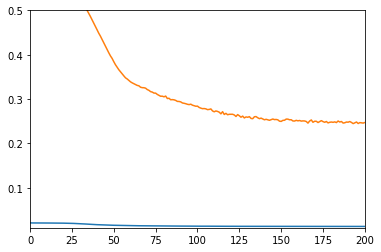

In [69]:
# print(iterations)
axes = plt.gca()
axes.set_xlim([0, 200])
axes.set_ylim([0.01, 0.5])
plt.plot(iterations, training_losses)
plt.plot(iterations, testing_losses)
plt.show()

In [70]:
index
correct = 0
for index, data in enumerate(test_loader):
    x_data, y_data = data
    x_data = Variable(x_data)
    y_data = Variable(y_data)
    y_pred = model(x_data)
    y_data.squeeze_()
    y_pred.squeeze_()
#     print(y_pred[0],y_data[0])
    for i in range(32):
        if y_pred[i].data.numpy() < 0.5 and y_data[i].data.numpy() == 0:
                correct = correct + 1
        if y_pred[i].data.numpy() >= 0.5 and y_data[i].data.numpy() == 1:
                correct = correct + 1
index = index + 1
total = 32 * index
accuracy = correct/total
print(f'Accuracy is {accuracy*100}%' )

Accuracy is 88.9423076923077%
